# Projeto Sprint 10 - Relatório de pesquisa de mercado de resturantes, Análise gráfica e apresentação

# Introdução

Análise e ralatório para abrir uma pequena cafeteria com garçons robôs em Los Angeles.
No projeto é realizada inferências sobre condições atuais do mercado, as principais caracteristicas encontradas com a base de dados coletada e as possibilidades levantadas para a abertura dessa cafeteria.

[Apresentação](https://1drv.ms/b/c/724b2c88352c89d1/EVvfU94QocVMrexGt1U5fGcBPnJHpIbeNR2rAKlGJpc-cg?e=dFfXG0)

## Sumário

1. [Abertura dos dados](#abertura_dados)
    * 1.1 [Verificação de dados duplicados e nulos](#verificacao_dados)
2. [Análise exploratória](#analise_exploratoria)
    * 2.1 [Agrupamentos iniciais](#agrupamentos_iniciais)
    * 2.2 [Gráficos iniciais](#graficos_iniciais)
3. [Hipóteses e Verificações](#verificacoes)
    * 3.1 [Gráficos Rede True and False](#graf_chain)
    * 3.2 [Gráfico Média de Cadeiras](#graf_media)
4. [Análise do negócio por endereço](#df_ruas)
    * 4.1 [Análise dos principais endereços](#df_10)
    * 4.2 [Análise dos principais endereços por Rede True and False](#df_10_TF)
5. [Conclusão](#conclusao)

<a id="abertura_dados"></a>
## 1. Abertura dos dados

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
import re

In [350]:
df = pd.read_csv('rest_data_us_upd.csv')

df

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [351]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB
None


In [352]:
print(df.describe())

                 id       number
count   9651.000000  9651.000000
mean   16611.000000    43.695161
std     2786.148058    47.622874
min    11786.000000     1.000000
25%    14198.500000    14.000000
50%    16611.000000    27.000000
75%    19023.500000    46.000000
max    21436.000000   229.000000


<a id="verificacao_dados"></a>
### 1.1 Verificação de duplicados e nulos 

    Duplicados: Sem valores duplicados;
    Nulos: 3 valores nulos na coluna 'chain', optado por exclui-los pela quantidade;

In [353]:
print(df.duplicated().sum())

0


In [354]:
print(df.isna().sum())
print()
print(df[df['chain'].isna()])

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

         id              object_name               address chain object_type  \
7408  19194  TAQUERIA LOS 3 CARNALES  5000 E WHITTIER BLVD   NaN  Restaurant   
7523  19309     JAMMIN JIMMY'S PIZZA   1641 FIRESTONE BLVD   NaN       Pizza   
8648  20434    THE LEXINGTON THEATER          129 E 3RD ST   NaN  Restaurant   

      number  
7408      14  
7523       1  
8648      35  


In [355]:
rest_df = df.dropna()
print(rest_df.isna().sum())

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64


<a id="analise_exploratoria"></a>
## 2 Análise exploratória

<a id="agrupamentos_iniciais"></a>
### 2.1 Agrupamentos iniciais

In [356]:
# agrupamento por tipo
group_type = rest_df.groupby('object_type').agg({'id':'count'}).reset_index()

# agrupamento por rede
group_chain = rest_df.groupby('chain').agg({'id':'count'}).reset_index()


<a id="graficos_iniciais"></a>
### 2.2 Gráficos iniciais

    Verificação do tipo de estabelecimentos mais relevantes em quantidade

Text(0.5, 1.0, 'Quantidade de estabelecimentos x Tipo')

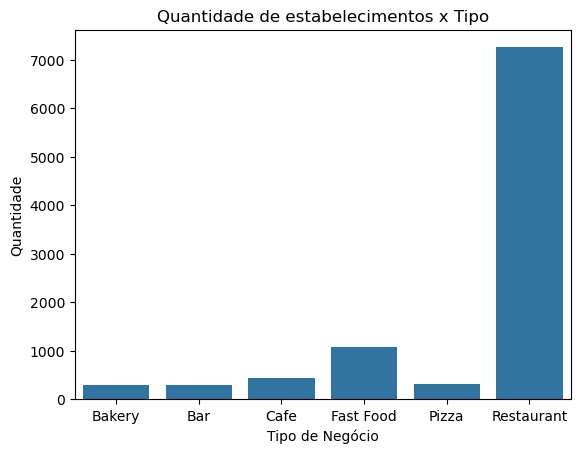

In [357]:
# gráfico por tipo e quantidade de estabelecimentos

g1 = sns.barplot(
    data=group_type, 
    x='object_type', 
    y='id',
    )
g1.set_xlabel('Tipo de Negócio')
g1.set_ylabel('Quantidade')
plt.title('Quantidade de estabelecimentos x Tipo')

    Verificação da proporção de estabelicimentos que são de Rede e os que são independentes

In [358]:
print(group_chain)
fig = go.Figure(data=[go.Pie(values=group_chain['id'], labels=group_chain['chain'])])
fig.show()

   chain    id
0  False  5972
1   True  3676


Text(0.5, 1.0, 'Proporção de Rede')

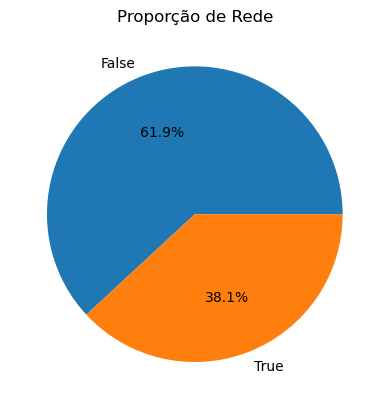

In [359]:
# gráfico por tipo e quantidade de estabelecimentos

plt.pie(
    group_chain['id'],
    labels=group_chain['chain'], 
    autopct='%1.1f%%'
    )
plt.title('Proporção de Rede')

# values=group_chain['id'], labels=group_chain['chain']

<a id="verificacoes"></a>
## 3 Hipóteses e Verificações

Verificação das proporções para Rede

In [360]:
# filtro por rede
filtro_type_rede = rest_df[rest_df['chain']==True]

# agrupamento por tipo e rede True
group_type_rede = filtro_type_rede.groupby('object_type').agg({'id':'count'}).reset_index()

print(group_type_rede.sort_values(by='id',ascending=False))


  object_type    id
5  Restaurant  2292
3   Fast Food   605
0      Bakery   283
2        Cafe   266
4       Pizza   153
1         Bar    77


Verificação das proporções para Rede e independentes

In [361]:
# agrupamento por tipo e rede e assentos
group_type_number = rest_df.groupby(['object_type','chain']).agg({'id':'count','number':'sum'}).reset_index()

print(group_type_number.sort_values(by=['number','chain'],ascending=[False,True]))

   object_type  chain    id  number
9   Restaurant  False  4961  245688
10  Restaurant   True  2292  102810
6    Fast Food   True   605   23044
5    Fast Food  False   461   10895
1          Bar  False   215    9972
4         Cafe   True   266    6894
0       Bakery   True   283    6162
7        Pizza  False   166    5200
3         Cafe  False   169    3981
8        Pizza   True   153    3906
2          Bar   True    77    3100


<a id="graf_chain"></a>
### 3.1 Gráficos Rede True and False

 - Quantidade geral de independentes é maior;
 - Rede: Restaurantes dominam, seguido por Fast Food

Text(0.5, 1.0, 'Quantidade de estabelecimentos x Tipo x Rede')

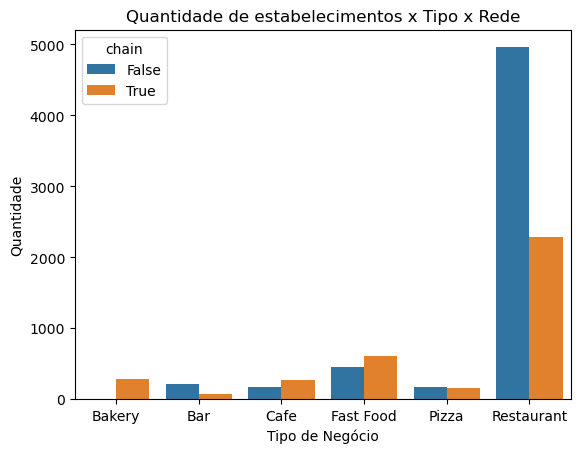

In [362]:
# gráfico por tipo e rede e assentos
# quantidade de estabelicimentos

g2 = sns.barplot(
    data=group_type_number, 
    x='object_type', 
    y='id', 
    hue='chain',)
g2.set_xlabel('Tipo de Negócio')
g2.set_ylabel('Quantidade')
plt.title('Quantidade de estabelecimentos x Tipo x Rede')

 - Número de cadeiras segue a mesma proporção dos estabelecimentos: Quantidade geral de independentes é maior; Rede: Restaurantes dominam, seguido por Fast Food

Text(0.5, 1.0, 'Quantidade de cadeiras x Tipo x Rede')

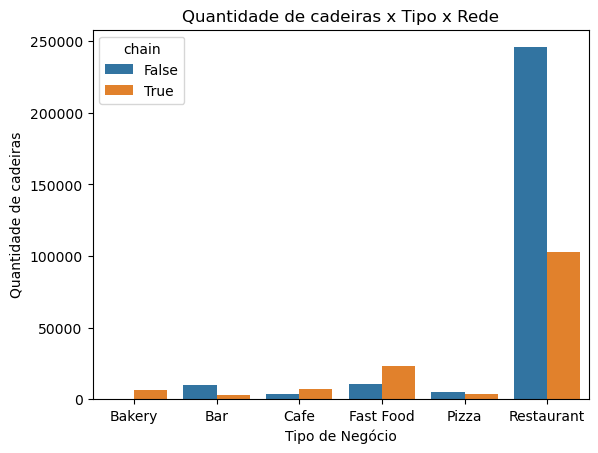

In [363]:
# gráfico por tipo e rede e assentos
# quantidade de cadeiras

g3 = sns.barplot(
    data=group_type_number, 
    x='object_type', 
    y='number', 
    hue='chain',)
g3.set_xlabel('Tipo de Negócio')
g3.set_ylabel('Quantidade de cadeiras')
plt.title('Quantidade de cadeiras x Tipo x Rede')

<a id="graf_media"></a>
### 3.2 Gráfico Média de Cadeiras

In [364]:
# 
# Determine o número médio de assentos para cada tipo de restaurante. 
# Em média, qual tipo de restaurante tem o maior número de assentos? Construa gráficos.

# agrupamento por tipo e rede e assentos
group_number_mean = rest_df.groupby(['object_type','chain']).agg({'id':'count','number':'mean'}).reset_index()

print(group_number_mean.sort_values(by=['number','chain'],ascending=[False,True]))

   object_type  chain    id     number
9   Restaurant  False  4961  49.523886
1          Bar  False   215  46.381395
10  Restaurant   True  2292  44.856021
2          Bar   True    77  40.259740
6    Fast Food   True   605  38.089256
7        Pizza  False   166  31.325301
4         Cafe   True   266  25.917293
8        Pizza   True   153  25.529412
5    Fast Food  False   461  23.633406
3         Cafe  False   169  23.556213
0       Bakery   True   283  21.773852


 - As médias de cadeiras são próximas entre Rede e Independentes;
 - Tipo de estabelecimento que sai da média é Fast Food, onde em Rede é maior;

Text(0.5, 1.0, 'Quantidade média de cadeiras x Tipo')

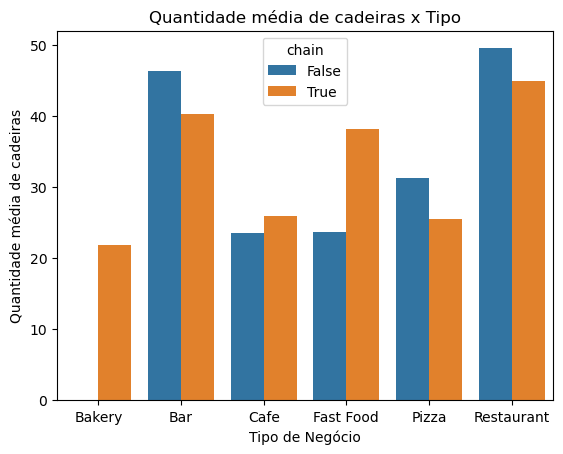

In [365]:
# gráfico por tipo e rede e assentos
# quantidade média de cadeiras

g4 = sns.barplot(
    data=group_number_mean, 
    x='object_type', 
    y='number', 
    hue='chain',)
g4.set_xlabel('Tipo de Negócio')
g4.set_ylabel('Quantidade média de cadeiras')
plt.title('Quantidade média de cadeiras x Tipo')

<a id="df_ruas"></a>
## 4 Análise do negócio por endereço

 - Quando o agrupamento é feito separando as Redes, dificulta a visualização dos locais mais movimentados;

In [366]:
# agrupamento por tipo e rede e assentos
group_address = rest_df.groupby(['address','object_type','chain']).agg({'id':'count','number':'sum'}).reset_index()

print(group_address.sort_values(by=['number','chain'],ascending=[False,True]))

                    address object_type  chain  id  number
6389      545 S FIGUEROA ST  Restaurant  False   5     531
157       10201 W PICO BLVD  Restaurant  False   3     486
7608          700 WORLD WAY  Restaurant  False   4     478
4651    3607 TROUSDALE PKWY  Restaurant   True   3     476
1564        135 N GRAND AVE  Restaurant  False   4     474
...                     ...         ...    ...  ..     ...
8538      851 S VERMONT AVE  Restaurant   True   1       1
8551  8522 S WESTERN AVE #B   Fast Food   True   1       1
8579       8583 W PICO BLVD      Bakery   True   1       1
8671  8752 S SEPULVEDA BLVD  Restaurant   True   1       1
8676       8781 W PICO BLVD   Fast Food   True   1       1

[8995 rows x 5 columns]


In [367]:
# merge para obter duas colunas de cadeiras para realizar 2 operações de agregar

merge_df = df.merge(df, on=['id','object_name','address','chain','object_type'], how='left', suffixes=(['1','2']))

print(merge_df)

         id          object_name                      address  chain  \
0     11786  HABITAT COFFEE SHOP       3708 N EAGLE ROCK BLVD  False   
1     11787             REILLY'S            100 WORLD WAY 120  False   
2     11788       STREET CHURROS      6801 HOLLYWOOD BLVD 253  False   
3     11789    TRINITI ECHO PARK           1814 W SUNSET BLVD  False   
4     11790               POLLEN           2100 ECHO PARK AVE  False   
...     ...                  ...                          ...    ...   
9646  21432      HALL OF JUSTICE             217 W TEMPLE AVE  False   
9647  21433          FIN-MELROSE             5750 MELROSE AVE  False   
9648  21434          JUICY WINGZ          6741 HOLLYWOOD BLVD   True   
9649  21435      MEDIDATE COFFEE      548 S SPRING ST STE 100  False   
9650  21436         CAFE SPROUTS  1300 S SAN PEDRO ST STE 111   True   

     object_type  number1  number2  
0           Cafe       26       26  
1     Restaurant        9        9  
2      Fast Food       2

 - Sem a distinção de Rede, é possivel verificar quais locais possuem a maior quantidade de estabelecimentos e podemos ordenar visualizando as médias de cadeiras e quantidades totais;

In [368]:
# agrupamento por endereço e cadeiras
group_merge_df = merge_df.groupby(['address',]).agg({'id':'count','number1':'mean','number2':'sum'}).reset_index()

print(group_merge_df.sort_values(by=['id','number2'],ascending=[False,False]))

                       address  id    number1  number2
4416       3607 TROUSDALE PKWY  11  92.727273     1020
1485           135 N GRAND AVE  10  76.500000      765
6436             600 WORLD WAY   9  42.777778      385
5799  5151 STATE UNIVERSITY DR   9  37.000000      333
4802             400 WORLD WAY   9  33.555556      302
...                        ...  ..        ...      ...
8331          9226 W PICO BLVD   1   1.000000        1
8342           927 BROXTON AVE   1   1.000000        1
8402        9401 S AVALON BLVD   1   1.000000        1
8409          9427 W PICO BLVD   1   1.000000        1
8510              OLVERA ST E8   1   1.000000        1

[8512 rows x 4 columns]


<a id="df_10"></a>
### 4.1 Análise dos principais endereços

In [369]:
address_10 = group_merge_df.nlargest(10,'id')
print(address_10)

                       address  id     number1  number2
4416       3607 TROUSDALE PKWY  11   92.727273     1020
1485           135 N GRAND AVE  10   76.500000      765
4802             400 WORLD WAY   9   33.555556      302
5799  5151 STATE UNIVERSITY DR   9   37.000000      333
6436             600 WORLD WAY   9   42.777778      385
2515  2025 AVENUE OF THE STARS   8  104.375000      835
3424             300 WORLD WAY   8   80.125000      641
6050         545 S FIGUEROA ST   8   97.125000      777
7198             700 WORLD WAY   8   70.750000      566
32               100 WORLD WAY   6   15.333333       92


 - Temos 4 locais com a mesma quantidade de estabelecimentos, mas com quantidades de cadeiras e médias diferentes;
 - Temos 3 locais com a 3 maior quantidade de estabelecimentos, mas com as menores médias e quantidades de cadeiras;

 Dificuldade de verificar o impacto na análise ao separar em Rede;
 Dificuldade de fazer distinção entre o tipo de estabelecimento, mas sabemos que a grande maioria eram Restaurantes;

Text(0.5, 1.0, 'Média de cadeiras X QTD de cadeiras x Núm de estabelecimentos')

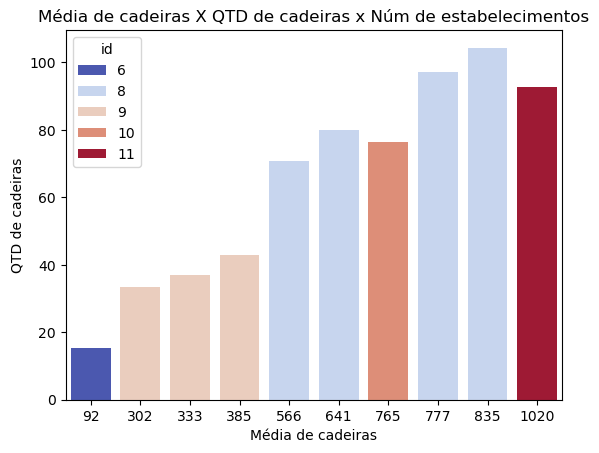

In [370]:
g5 = sns.barplot(
    data=address_10, 
    x='number2', 
    y='number1', 
    hue='id', 
    palette='coolwarm',) 
g5.set_xlabel('Média de cadeiras')
g5.set_ylabel('QTD de cadeiras')
plt.title('Média de cadeiras X QTD de cadeiras x Núm de estabelecimentos')


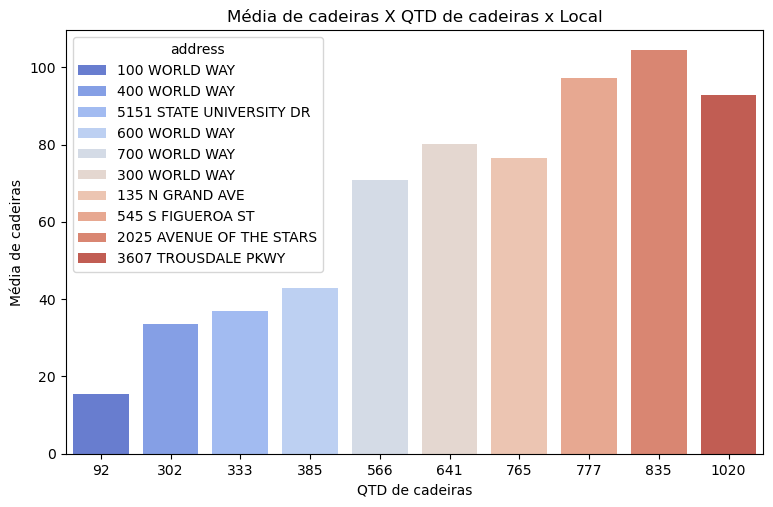

In [371]:
fig, g6 = plt.subplots(figsize=(9, 5.5))

sns.barplot(
    data=address_10, 
    x='number2', 
    y='number1', 
    hue='address', 
    palette='coolwarm',
    ax=g6) 
g6.set_ylabel('Média de cadeiras')
g6.set_xlabel('QTD de cadeiras')
plt.title('Média de cadeiras X QTD de cadeiras x Local')

plt.show()

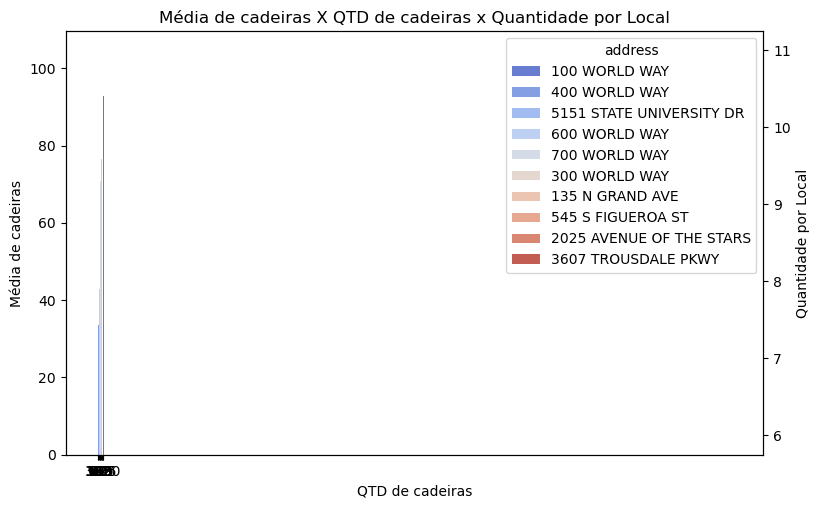

In [372]:
fig, g6 = plt.subplots(figsize=(9, 5.5))

sns.barplot(
    data=address_10, 
    x='number2', 
    y='number1', 
    hue='address', 
    palette='coolwarm',
    ax=g6) 
g6.set_ylabel('Média de cadeiras')

g6_eixo2 = g6.twinx()

sns.lineplot(
    data=address_10,
    x='number2',
    y='id',
    hue='address',
    palette='coolwarm',
    ax=g6_eixo2,
    )
g6_eixo2.set_ylabel('Quantidade por Local')
g6_eixo2.legend_.remove()

g6.set_xlabel('QTD de cadeiras')
plt.title('Média de cadeiras X QTD de cadeiras x Quantidade por Local')

plt.show()

In [373]:
# agrupamento por endereço e cadeiras
group_address_min = merge_df.groupby(['address',]).agg({'id':'count','number1':'mean','number2':'sum'}).reset_index()
group_address_min1 = group_address_min[group_address_min['id']==1]

print(group_address_min1.count())

address    7596
id         7596
number1    7596
number2    7596
dtype: int64


<a id="df_10_TF"></a>
### 4.2 Análise dos principais endereços por Rede True and False

In [374]:
# agrupamento por endereço e cadeiras
group_merge_df2 = merge_df.groupby(['address','chain','object_type']).agg({'id':'count','number1':'mean','number2':'sum'}).reset_index()

print(group_merge_df2.sort_values(by=['id','number2'],ascending=[False,False]).head(20))

                       address  chain object_type  id     number1  number2
6389         545 S FIGUEROA ST  False  Restaurant   5  106.200000      531
3609             300 WORLD WAY  False  Restaurant   5   94.600000      473
2646  2025 AVENUE OF THE STARS  False  Restaurant   5   81.800000      409
8740        900 W OLYMPIC BLVD  False  Restaurant   5   79.400000      397
1562           135 N GRAND AVE  False         Bar   5   57.800000      289
7607             700 WORLD WAY  False  Restaurant   4  119.500000      478
1564           135 N GRAND AVE  False  Restaurant   4  118.500000      474
7065       6250 HOLLYWOOD BLVD  False  Restaurant   4  110.500000      442
7242        6360 W SUNSET BLVD  False  Restaurant   4   54.250000      217
3329        2700 N VERMONT AVE  False  Restaurant   4   42.500000      170
5063             400 WORLD WAY  False  Restaurant   4   37.500000      150
6114  5151 STATE UNIVERSITY DR  False  Restaurant   4   32.000000      128
6116  5151 STATE UNIVERSI

    Ao separar em Rede, conseguimos ver uma grande diferença de proporção nos locais mais movimentados:
     - Predominância de estabelecimentos independentes, numa proporção maior do que verificação inicial de 62%, contra a de 10% do gráfico atual (2/20) , sendo necessário cuidado ao aprofundar as análises;
     - Uma maior quantidade de estabelecimentos não quer dizer uma maior média de cadeiras, sendo necessário cuidado ao aprofundar as análises;

Text(0.5, 1.0, 'Média de cadeiras X QTD de cadeiras x Rede')

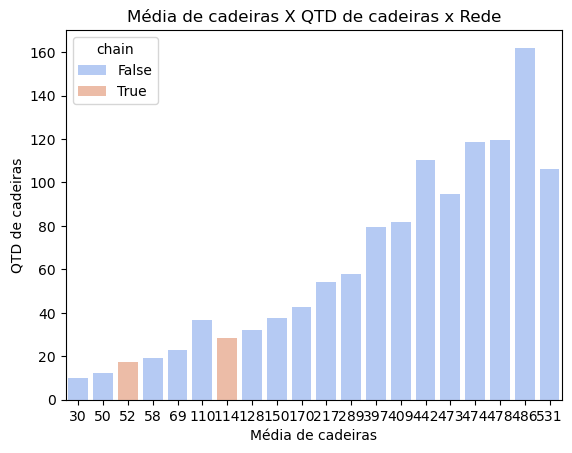

In [375]:
filtro_address = group_merge_df2.nlargest(20, 'id')

g7 = sns.barplot(
    data=filtro_address, 
    x='number2', 
    y='number1', 
    hue='chain', 
    palette='coolwarm',)
g7.set_xlabel('Média de cadeiras')
g7.set_ylabel('QTD de cadeiras')
plt.title('Média de cadeiras X QTD de cadeiras x Rede')

<a id="conclusao"></a>
## 5. Conclusão

    Como premissa, estou considerando densidade a quantidade de estabelecimentos por local e quantidade de cadeiras, com isso, podemos verificar que a maior proporção dos estabelecimentos são independentes e isso se reflete nos locais com maior densidade, mas não na mesma razão, a razão nos 20 locais mais movimentados é somente de 10% de rede, enquanto analisando o total geral é de 38%.
    Nesses top 20 locais, 18 são restaurantes sendo 2 pertencentes a redes.
    Com essas observações, não fica totalmente claro se há mais oportunidades para se inserir no mercado como uma cafeteria de Rede ou não, mas quanto ao tipo de negócio Cafeteria, podemos abrir algumas hipóteses.
    Nos 20 locais com maior densidade o tipo de negocio dominante é de Restaurantes, nos abrindo a hipótese de que abrir uma cafeteria é bom pois os clientes após sairem do restaurantes tem possibilidade de tomar um café.
    A outra possibilidade de hipótese, é abrir em algum dos 9 locais mais densos, para aumentar o marketing visual e a possibilidade dos clientes irem após a refeição nos restaurantes